In [2]:
#Data manipulation libraries : 
import numpy as np  #numpy
import pandas as pd  #pandas
import tensorflow as tf

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#math operations lib 
import math
from math import pi

#date manipulation 
import datetime as dt

#Impute missing data
from sklearn.preprocessing import Imputer 

#Deep learning with keras
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Splitting data to test and train 
from sklearn.model_selection import train_test_split

import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
import time
import datetime as dt
from datetime import datetime
import collections
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib.pyplot import rcParams
from sklearn import linear_model

import warnings 
warnings.filterwarnings(action="ignore")

Using TensorFlow backend.


# 1.- Variable identification

**Check out the data**

In [3]:
data = pd.read_csv('C:/Users/Taha/Downloads/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null int64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [5]:
# check datatypes
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [6]:
#Quantitative variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [7]:
#Categorical variables:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [8]:
#'Formatted Date' transformation:

data['Date'] = pd.to_datetime(data['Formatted Date'],utc=True)
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2006,4,1,2


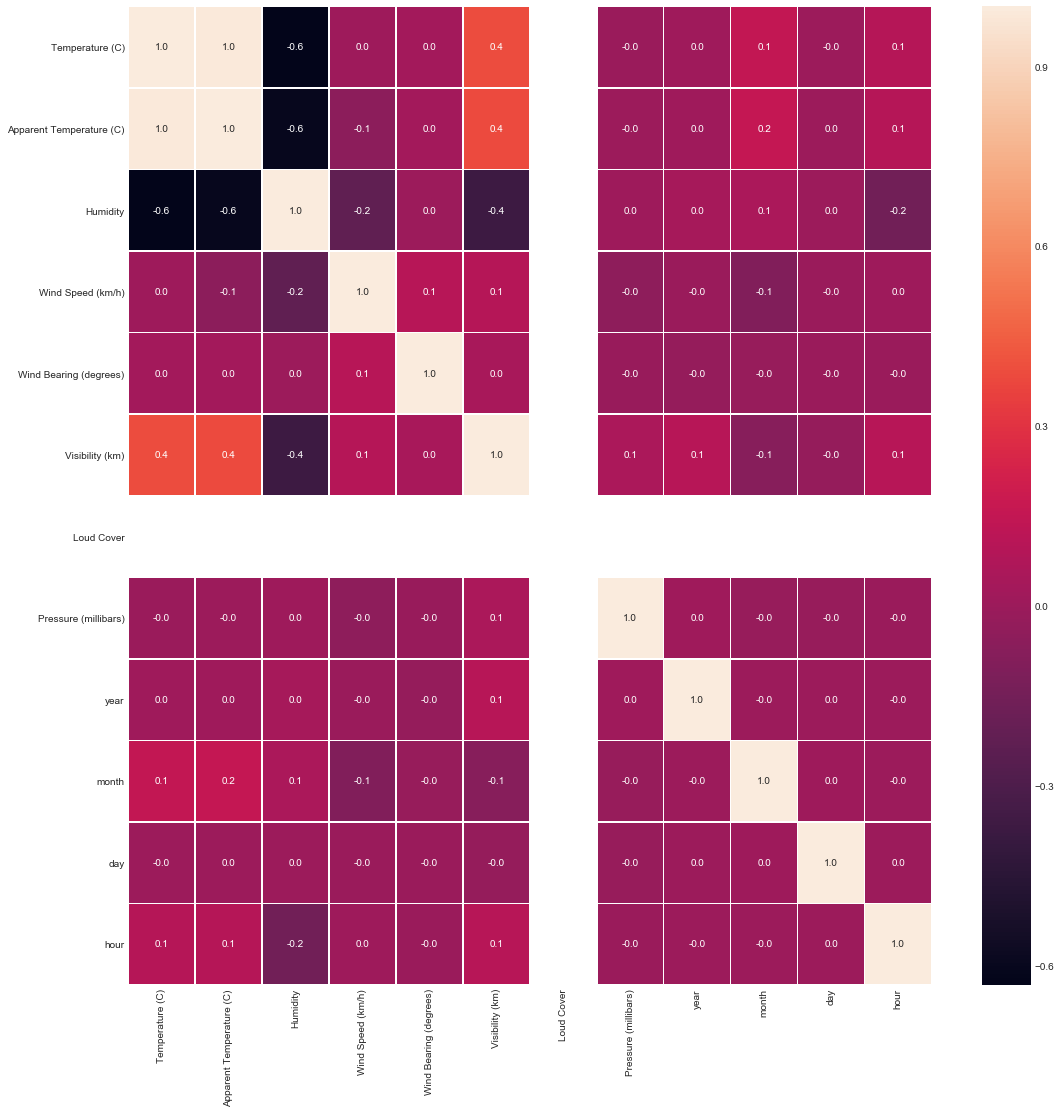

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


# 2. Quantitative variables. Missing values

In [10]:
data[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CB9E040B8>,
      dtype=object)

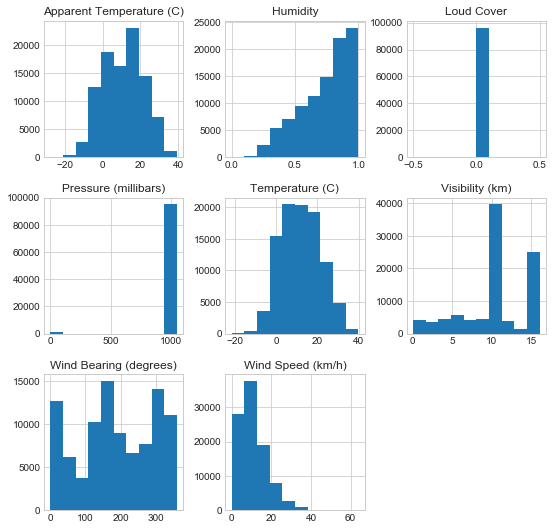

In [11]:
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

'Loud Cover' takes values zero. We drop it

In [12]:
data=data.drop('Loud Cover',axis=1)

"Pressure (millibars)".

Some observations are nil. It seems that they lack values because the pressure does not take zero as value.

Let's fill the zeros with the median:

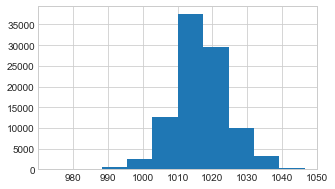

In [13]:
pressure_median = data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
data['Pressure (millibars)'].hist()


# 3. Categorical variables

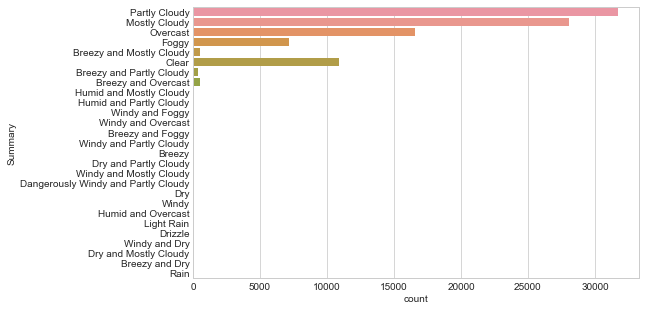

In [14]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])

In [15]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                                        20085
Partly cloudy throughout the day.                                                                                         9981
Partly cloudy until night.                                                                                                6169
Partly cloudy starting in the morning.                                                                                    5184
Foggy in the morning.                                                                                                     4201
Foggy starting overnight continuing until morning.                                                                        3576
Partly cloudy until evening.                                                                                              3288
Mostly cloudy until night.                                                                                     

In [16]:
data['Summary'].value_counts(dropna=False)

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

Most common categories are: Partly Cloudy (33%), Mostly Cloudy(29%), Overcast (17%), Clear (11%), Foggy(7%) = 97% out of the total.  
Moreover, these weather conditions also appear  with other weather characteristics. E.g. 'Windy and Foggy'.  
Let's create a new categorical variable:
Cloud (summary) : Foggy (5), Overcast (4), Mostly Cloudy (3), Partly Cloudy (2), Clear (1), Nothing (0)  
There are other weather characteristics contained in 'Summary': Windy&Breezy, Rain, Humid&Dry but there are just a few observations within these categories. Moreover this information is already contained in other variables: 'Wind Speed (km/h)', 'Precip Type' and 'Humidity'.

In [17]:
data['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [18]:
data.fillna(method='ffill', inplace=True)

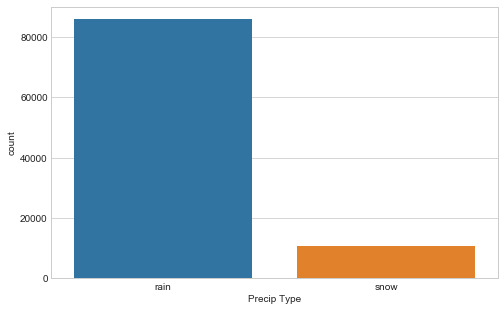

In [19]:
sns.countplot(x=data['Precip Type'])

<Figure size 1296x576 with 0 Axes>

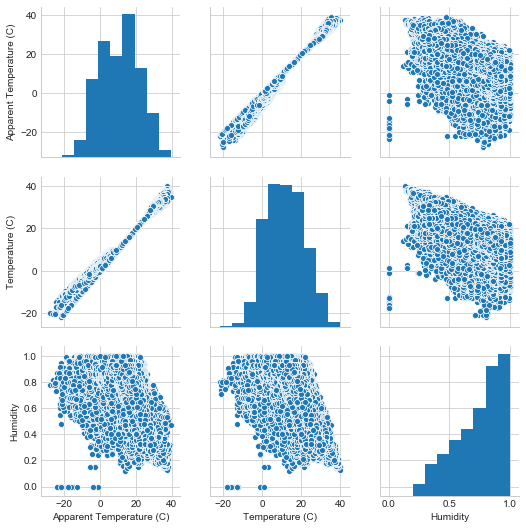

In [20]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

<Figure size 1296x576 with 0 Axes>

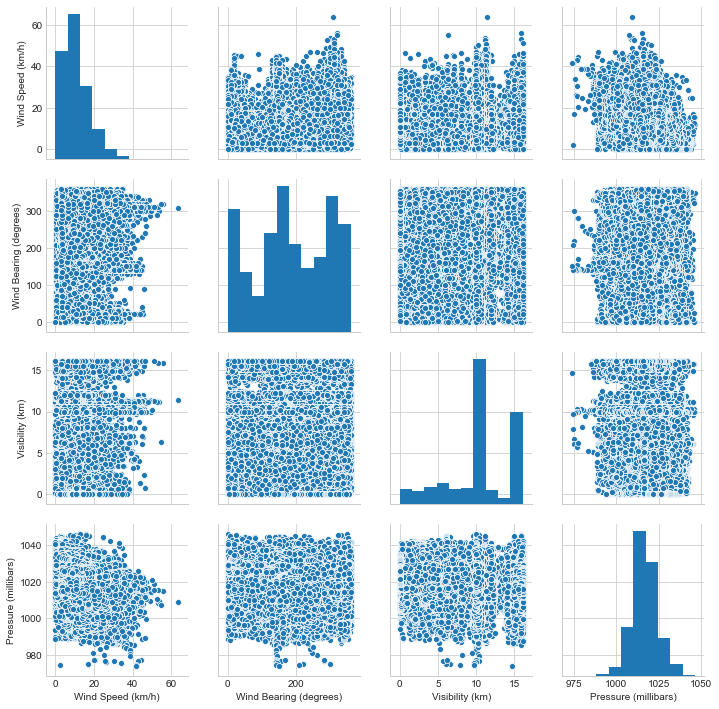

In [21]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()

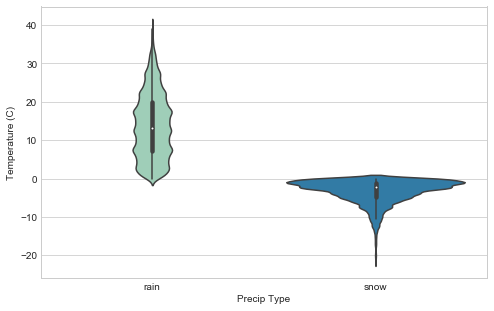

In [22]:
sns.violinplot(x="Precip Type", y="Temperature (C)", data=data, palette="YlGnBu");

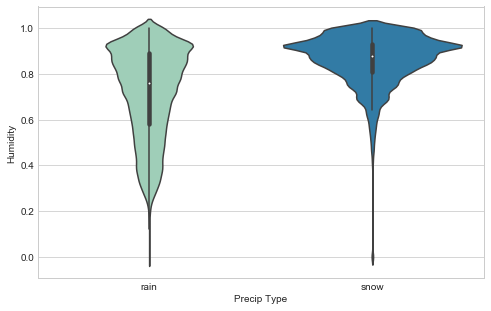

In [23]:
sns.violinplot(x="Precip Type", y="Humidity", data=data, palette="YlGnBu");

With these plots we can choose two variables to study the relationship betweem them.

In this study let's focus to explore Temperature as a function of Humidity : how humidity influences in temperature?.

**Linear Regression**

In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ls = linear_model.LinearRegression()



X = data["Humidity"].values.reshape(-1,1)
y = data["Temperature (C)"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    shuffle=True, random_state=0)
print("Linear Regression")
ls.fit(X_train, y_train)
print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)
print("\n\nCalculating some regression quality metrics")
y_pred = ls.predict(X_test)
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 = ",r2_score(y_test, y_pred))

Linear Regression
alpha =  [-30.86657506]
beta =  [34.61438171]


Calculating some regression quality metrics
RMSE =  7.397042727957195
R2 =  0.4004047204664315


**Decision Tree Classifier**

In [25]:
summarylist=list(dict.fromkeys(data['Daily Summary']))

def change_dailysummary_to_number(DailySummaryCat):
    j=0
    for i in summarylist:
        j+=1
        if DailySummaryCat==i:
            return j


In [26]:
# assign a numerical value to the categorical field of class, by using the above function
data['DailySummaryCat'] = data['Daily Summary'].apply(change_dailysummary_to_number)

In [27]:
data.fillna(method='ffill', inplace=True)

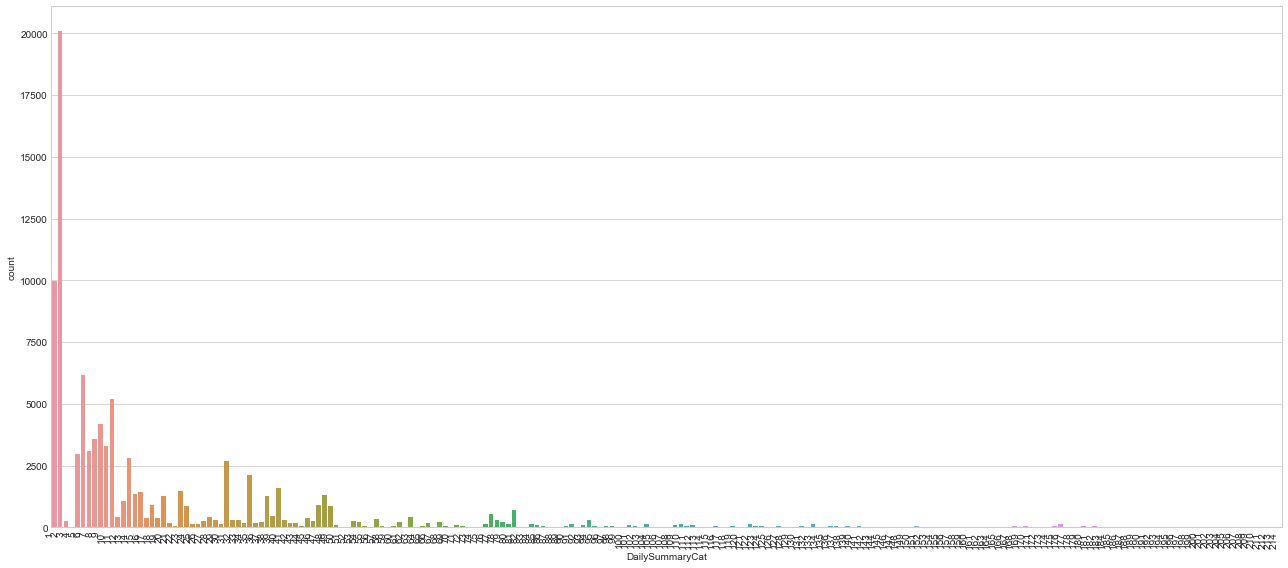

In [28]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['DailySummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [29]:
summarylist2=list(dict.fromkeys(data['Summary']))

def change_summary_to_number(SummaryCat):
    j=0
    for i in summarylist2:
        j+=1
        if SummaryCat==i:
            return j

In [30]:
# assign a numerical value to the categorical field of class, by using the above function
data['SummaryCat'] = data['Summary'].apply(change_summary_to_number)

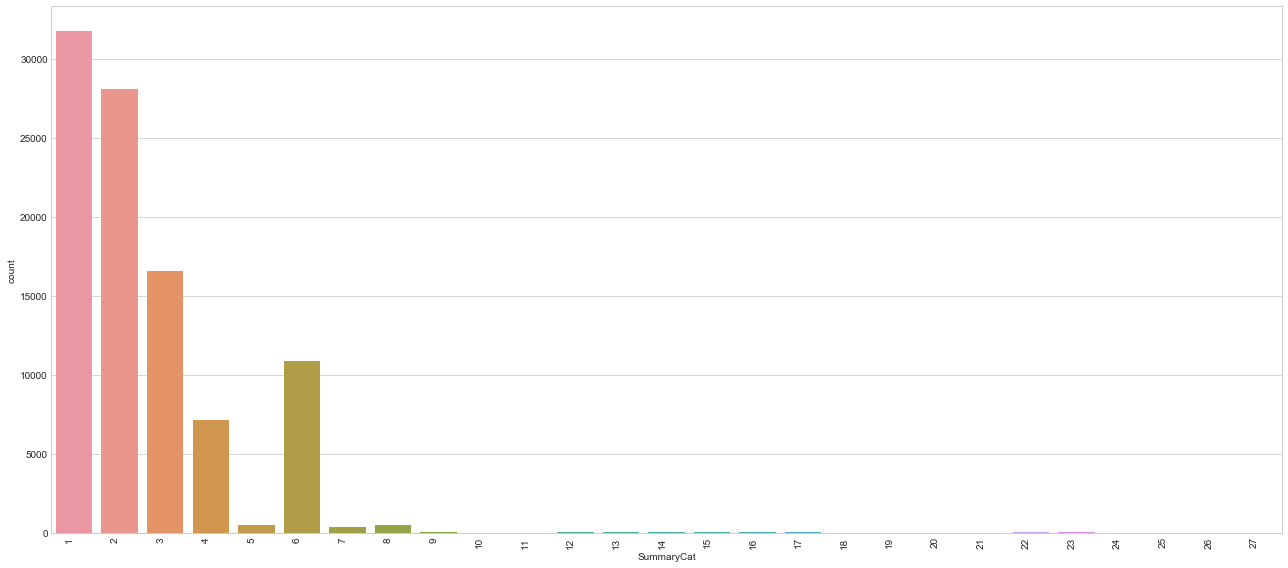

In [31]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['SummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [32]:
def change_category(PrecipTypeCat):
    if PrecipTypeCat=='rain':
        return 1
    elif PrecipTypeCat=='snow':
        return 2

In [33]:
# assign a numerical value to the categorical field of class, by using the above function
data['PrecipTypeCat'] = data['Precip Type'].apply(change_category)

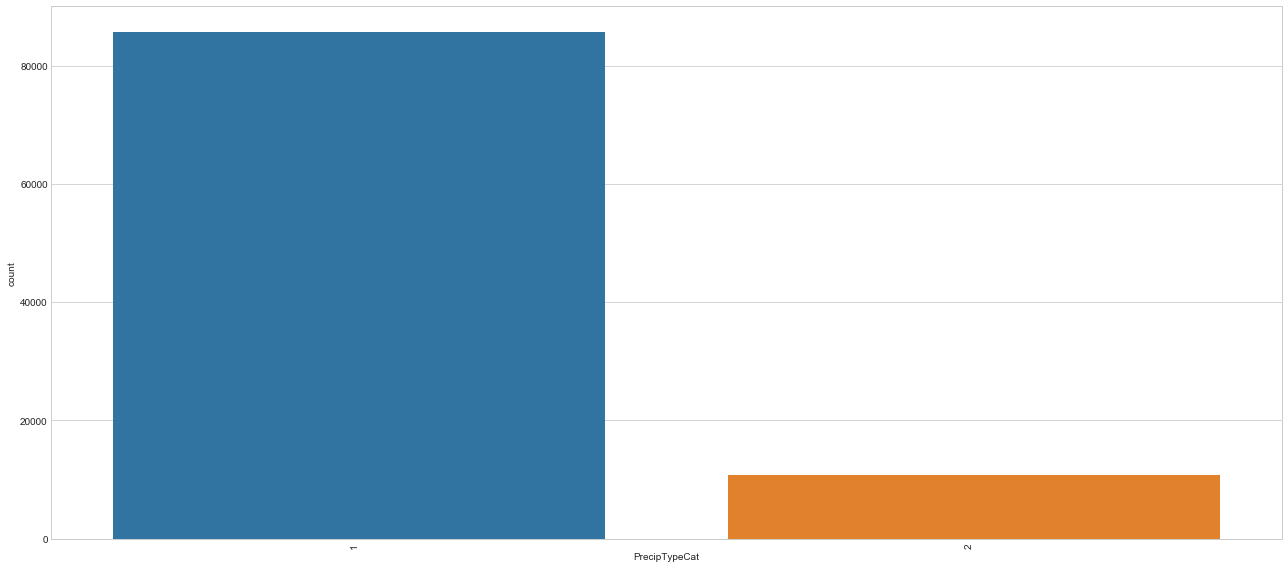

In [34]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['PrecipTypeCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [35]:
data.drop(['Formatted Date','Summary','Daily Summary','Precip Type','Date'], axis=1,inplace=True)
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,hour,DailySummaryCat,SummaryCat,PrecipTypeCat
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2006,3,31,22,1,1,1
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2006,3,31,23,1,1,1
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,2006,4,1,0,1,2,1
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2006,4,1,1,1,1,1
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,2006,4,1,2,1,2,1


In [36]:
X=data.drop('DailySummaryCat',axis=1)
y=data['DailySummaryCat']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
dtclassifier = DecisionTreeClassifier(criterion='gini', max_depth=3,random_state=128)
dtclassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=128,
            splitter='best')

In [50]:
dtprediction = dtclassifier.predict(X_test)

In [51]:
dtprediction[:100]

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  2,  2,  2,  2,  1,  2, 11,
        1, 24,  1,  8,  8, 11,  2,  2,  1,  2,  1,  2,  1, 11,  2,  2,  2,
        2,  2,  2,  1,  8,  2,  2,  2,  8,  8,  1,  1,  1,  2, 24,  1,  8,
        2, 11, 11, 11,  2,  2,  2,  1,  2, 11,  2,  2,  2,  2,  1,  2,  2,
        2,  1,  2,  1,  1,  2,  1,  1,  1,  2,  2,  1,  1, 11,  1,  1,  2,
       11,  2,  1,  2, 11,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [40]:
y_test[:100]

87206      1
33421      8
6807      11
37340     38
3016      37
54286     38
27660     40
6108       2
95359      8
85743     49
38539    123
4472       2
46065      9
67978      3
83359      1
95581     71
71799     42
56840      6
81497      9
31125      1
63193     31
50811     77
23883    112
92305      2
90644     38
80060      2
10085      2
77665     38
53483     14
34348     14
        ... 
9804       1
62475      1
62144      1
18647     40
80101     81
77757      2
63395     23
47938      1
38691     93
74636      1
30566      6
88893     15
71361     14
17342     31
83126      7
3656       6
84630      5
19712     10
17689      2
44161     48
43106     31
71217      1
69573      2
29800      2
53799     13
66570     40
12670     15
66455      1
8341      14
68635      1
Name: DailySummaryCat, Length: 100, dtype: int64

In [41]:
dtclassifier.score(X_test,y_test)

0.2686964335084324

In [54]:
print("RMSE = ",np.sqrt(mean_squared_error(y_test, dtprediction)))

RMSE =  37.43534436219945


**Logistic Regression**

In [42]:
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,hour,DailySummaryCat,SummaryCat,PrecipTypeCat
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2006,3,31,22,1,1,1
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2006,3,31,23,1,1,1
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,2006,4,1,0,1,2,1
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2006,4,1,1,1,1,1
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,2006,4,1,2,1,2,1


In [44]:
lrclassifier = LogisticRegression(penalty='l2',dual=False,max_iter=145,C=2,fit_intercept=False)

In [45]:
X_train,X_test,y_train,y_test= train_test_split(X, y , test_size=0.2, random_state=42)

lrclassifier.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=145, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
lrprediction = lrclassifier.predict(X_test)

In [47]:
lrprediction[:3000]

array([ 1,  2,  2, ...,  2, 24,  2], dtype=int64)

In [48]:
y_test[:100]

87206      1
33421      8
6807      11
37340     38
3016      37
54286     38
27660     40
6108       2
95359      8
85743     49
38539    123
4472       2
46065      9
67978      3
83359      1
95581     71
71799     42
56840      6
81497      9
31125      1
63193     31
50811     77
23883    112
92305      2
90644     38
80060      2
10085      2
77665     38
53483     14
34348     14
        ... 
9804       1
62475      1
62144      1
18647     40
80101     81
77757      2
63395     23
47938      1
38691     93
74636      1
30566      6
88893     15
71361     14
17342     31
83126      7
3656       6
84630      5
19712     10
17689      2
44161     48
43106     31
71217      1
69573      2
29800      2
53799     13
66570     40
12670     15
66455      1
8341      14
68635      1
Name: DailySummaryCat, Length: 100, dtype: int64

In [49]:
lrclassifier.score(X_test,y_test)

0.25991394951013425

In [55]:
print("RMSE = ",np.sqrt(mean_squared_error(y_test, lrprediction)))

RMSE =  36.481047532811964


**Neural Model for Weather Prediction**

In [56]:
data_neur=data

In [57]:
data_neur['T'] = data['Temperature (C)']
data_neur['TA'] = data['Apparent Temperature (C)']
data_neur['H'] = data['Humidity']
data_neur['WS'] = data['Wind Speed (km/h)']
data_neur['WB'] = data['Wind Bearing (degrees)']
data_neur['V'] = data['Visibility (km)']
data_neur['P'] = data['Pressure (millibars)']
data_neur['Y'] = data['year']
data_neur['M'] = data['month']
data_neur['D'] = data['day']
data_neur['HR'] = data['hour']
data_neur['SC'] = data['SummaryCat']
data_neur['PT'] = data['PrecipTypeCat']
data.drop(['hour','day','month','year','Pressure (millibars)','Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','SummaryCat','PrecipTypeCat'],axis=1,inplace=True)
data_neur.head()

,DailySummaryCat,T,TA,H,WS,WB,V,P,Y,M,D,HR,SC,PT
0,1,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2006,3,31,22,1,1
1,1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2006,3,31,23,1,1
2,1,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,2006,4,1,0,2,1
3,1,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2006,4,1,1,1,1
4,1,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,2006,4,1,2,2,1


In [58]:
# X will be a pandas dataframe of all columns except meantempm
X = data_neur[[col for col in data_neur.columns if col != 'DailySummaryCat']]

# y will be a pandas series of the meantempm
y = data_neur['DailySummaryCat']

In [59]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=42)

In [60]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.4, random_state=42)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   57871, Training features   13
Validation instances 15433, Validation features 13
Testing instances    23149, Testing features    13


In [61]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [63]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002023CEF67F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [64]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=260): # 260 is used as we have approx 570 dataset for training
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [ ]:
evaluations = []
STEPS = 260
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

In [66]:
evaluations[0]

{'average_loss': 1135.878,
 'label/mean': 22.216484,
 'loss': 292166.78,
 'prediction/mean': 22.031813,
 'global_step': 260}

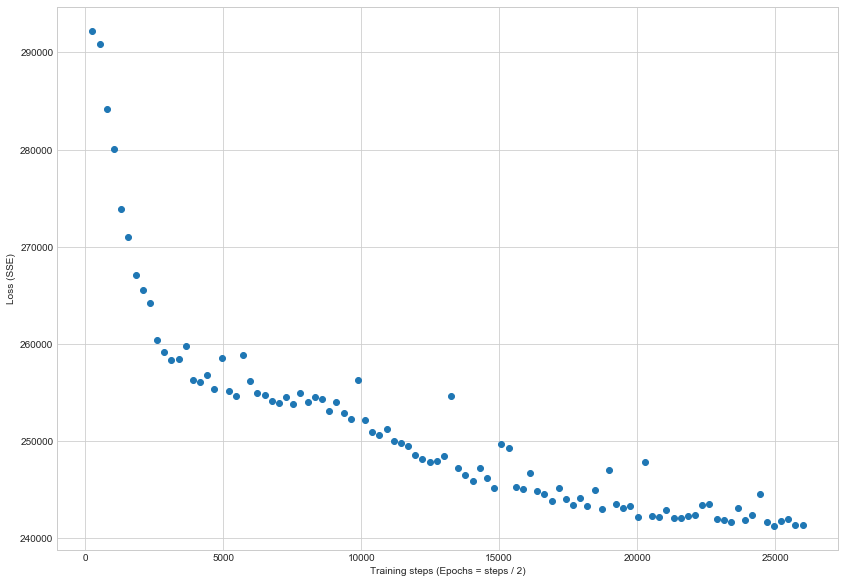

In [67]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

**LSTM**

In [68]:
data.head()

,DailySummaryCat,T,TA,H,WS,WB,V,P,Y,M,D,HR,SC,PT
0,1,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2006,3,31,22,1,1
1,1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2006,3,31,23,1,1
2,1,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,2006,4,1,0,2,1
3,1,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2006,4,1,1,1,1
4,1,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,2006,4,1,2,2,1


In [99]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
import warnings 
warnings.filterwarnings(action="ignore")

In [100]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

In [101]:
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    agg.dropna(inplace=True)
    return agg.values

In [102]:
# root mean squared error or rmse
def measure_rmse(actual, predicted): 
    plt.plot(actual,color='red',label='Actual') 
    plt.plot(predicted,color='green',label='Predicted') 
    plt.legend()    
    plt.show()
    return sqrt(mean_squared_error(actual, predicted))

In [103]:
# difference dataset
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]

In [104]:
# fit a model
def model_fit(train, config):
    # unpack config
    n_input, n_nodes, n_epochs, n_batch, n_diff = config
    # prepare data
    if n_diff > 0:
        train = difference(train, n_diff)
    data = series_to_supervised(train, n_in=n_input)
    train_x, train_y = data[:, :-1], data[:, -1]
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
    # define model
    model = Sequential()
    model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, 1)))
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(n_nodes, activation='relu'))   
    model.add(Dense(n_nodes, activation='relu')) 
    model.add(Dense(n_nodes, activation='relu'))  
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(n_nodes, activation='relu'))   
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # fit
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

In [105]:
# forecast with a pre-fit model
def model_predict(model, history, config):
    # unpack config
    n_input, _, _, _, n_diff = config
    # prepare data
    correction = 0.0
    if n_diff > 0:
        correction = history[-n_diff]
        history = difference(history, n_diff)
    x_input = array(history[-n_input:]).reshape((1, n_input, 1))
    # forecast
    yhat = model.predict(x_input, verbose=0)  
    return correction + yhat[0]

In [106]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error

In [107]:
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=3):
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    return scores

In [108]:
# summarize model performance
def summarize_scores(name, scores):
    # print a summary
    scores_m, score_std = mean(scores), std(scores)
    print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
    # box and whisker plot
    pyplot.boxplot(scores)
    pyplot.show()

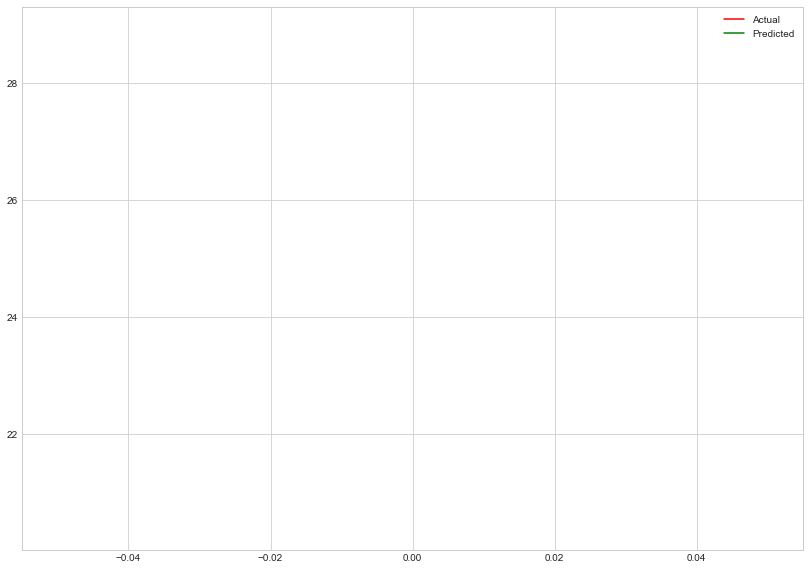

 > 8.442


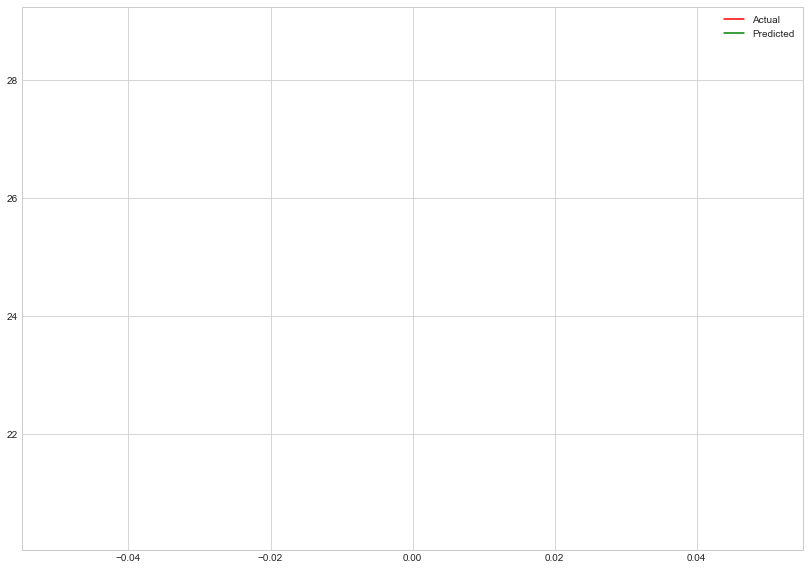

 > 8.395


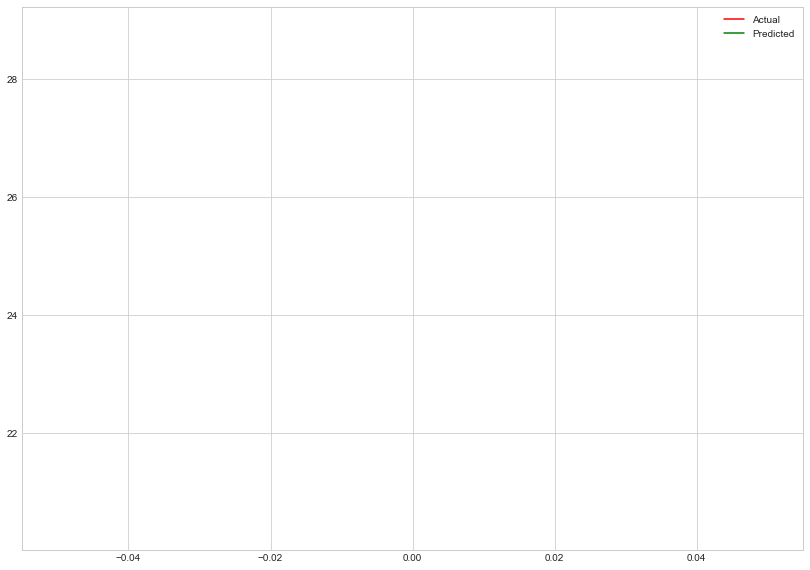

 > 8.362
lstm: 8.400 RMSE (+/- 0.033)


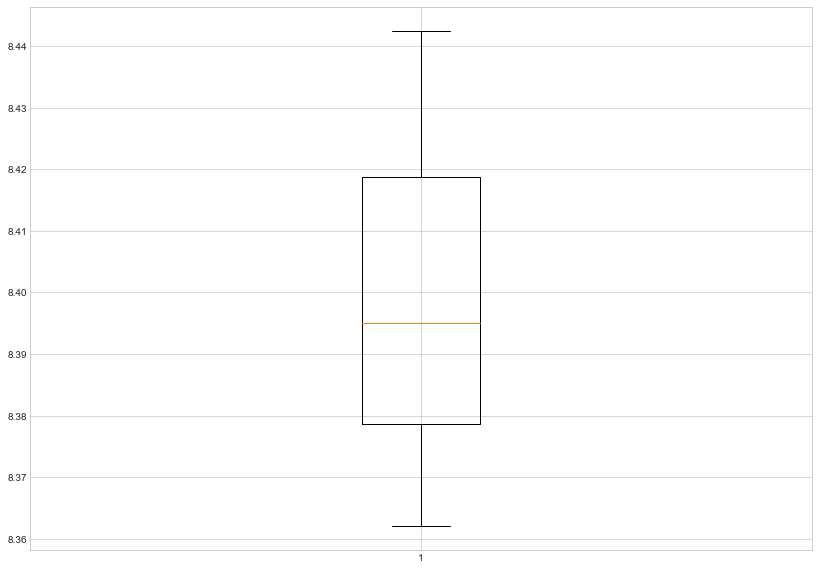

In [127]:
series = pd.read_csv("C:/Users/Taha/Downloads/weatherHistory.csv",header=0,index_col=0)
series2 = series.loc[:, ['Temperature (C)']]


data = series2.values
# print(series2)

# data split
n_test = 1

# define config
config = [1,2,3,4,5]#, 250, 300, 200, 12]

# grid search
scores = repeat_evaluate(data, config, n_test)

# summarize scores
summarize_scores('lstm', scores)